In [2]:
%%html
<style>
img {
    max-height:180px;
    margin: 0 !important;
}
</style>

In [3]:
import numpy as np
import pandas as pd
import seaborn as sb
import sklearn as sk
import scipy as sp
import matplotlib.pyplot as plot
%matplotlib inline

# Opgave 0: Importeren van Iris-dataset
_**A.** Voordat je aan de opgaves kunt beginnen, moet je eerst de Iris-dataset kunnen inladen/hebben ingeladen. Schrijf daarvoor een Python-script, waarvan je de code steeds gebruikt bij de komende opgaves._

In [4]:
data = pd.read_csv('IrisData.csv', sep=';')

_**B.** Verdeel deze Iris-dataset ook in een trainingset en een testset. Deze zullen bij de komende opgaven gebruikt worden._

In [5]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, random_state=1)

# Opgave 1: Lineaire regressie
In deze opgave ga je lineaire  regressie  oefenen  door  het  toe  te  passen op  de  Iris-dataset.  Het  is  de  bedoeling dat je dit doet door het uit te programmeren in Python.

_**A.** Lineaire regressie is tijdens de les in week 3 behandeld. Omschrijf in je eigen woorden wat lineaire regressie precies inhoudt. Leg dit uit door middel van een tekening._

Aan de hand van de voorafgaande resultaten bepalen wat het volgende resultaat gaat worden.
![](http://www.camo.com/images/linear_regression.jpg)

_**B.** Bij lineaire regressie is het belangrijk dat metingen in een dataset gecorreleerd aan elkaar moeten zijn. Deze correlatie is te bewijzen door middel van een wiskundige formule. Welke formule is dat? Gebruik deze formule om te  bepalen welke metingen in de Iris-dataset gecorreleerd zijn aan elkaar. _

$r={n(\sum{xy})-(\sum{x})(\sum{y}) \over \sqrt{[n\sum{x^2}-(\sum{x})^2][n\sum{y^2}-(\sum{y})^2]}}$

In [6]:
sX = data["Sepal.Length"]
sY = data["Sepal.Width"]
pX = data["Petal.Length"]
pY = data["Petal.Width"]
r_sepalLength_petalLength = np.correlate(sX, pX);
r_petalWidth_petalWidth = np.correlate(sX, pX);
r_sepalLength_sepalWidth = np.correlate(sX, sY);
r_petalLength_petalWidth = np.correlate(pX, pY);

_**C.** Als je opgave 1. B correct uitgevoerd hebt, weet je nu welke metingen gecorreleerd zijn aan elkaar. Het is aan  jou de taak om de lineaire regressie tussen al deze gecorreleerde metingen toe te passen. Hierbij wordt bedoeld dat je  steeds 2 metingen aan elkaar koppelt en dat je daarbij de formule tussen deze 2 metingen moet bepalen. Deze formule heeft altijd de vorm van: $y = a x + b$ Schrijf hiervoor een script in Python._

In [7]:
lr_sepalLength_petalLength = np.poly1d(np.polyfit(sX, pX, 1))
lr_sepalWidth_petalWidth = np.poly1d(np.polyfit(sY, pY, 1))
lr_sepalLength_sepalWidth = np.poly1d(np.polyfit(sX, sY, 1))
lr_petalLength_petalWidth = np.poly1d(np.polyfit(pX, pY, 1))

_**D.** Genereer van alle gegenereerde formules van de metingen van opgave 1.C plots. In elke plot moet de lijn van de lineaire regressie te zien zijn. Bewaar elke plot als plaatje._

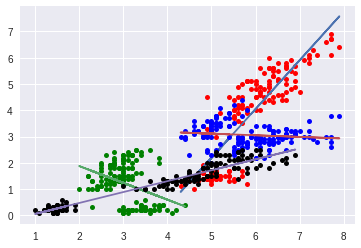

In [14]:
plot.plot(sX, pX, 'ro', sX, lr_sepalLength_petalLength(sX), markersize=5)
plot.plot(sY, pY, 'go', sY, lr_sepalWidth_petalWidth(sY), markersize=5)
plot.plot(sX, sY, 'bo', sX, lr_sepalLength_sepalWidth(sX), markersize=5)
plot.plot(pX, pY, 'ko', pX, lr_petalLength_petalWidth(pX), markersize=5)

_**E.** Als je de plots bekijkt die je hebt gemaakt in opgave 1.D, zie je dat er datapunten zijn die heel ver van regressielijn liggen. Dit zijn zogenaamde outliers. Deze outliers  hebben een enorm negatief effect op de lineaire regressie met de andere datapunten. Om te kijken hoeveel effect deze outliers hebben op de lineaire moet je alle outliers uit je metingen van opgave 1.C verwijderen en dezelfde gecorreleerde metingen weer plotten, zoals je in opgave 1.D hebt gedaan._

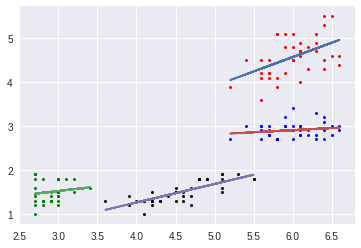

In [17]:
without_outliers = data.drop('Species', 1)
without_outliers = without_outliers[(np.abs(sp.stats.zscore(without_outliers)) < 1).all(axis=1)]
wsX = without_outliers["Sepal.Length"]
wsY = without_outliers["Sepal.Width"]
wpX = without_outliers["Petal.Length"]
wpY = without_outliers["Petal.Width"]
lr_sepalLength_petalLength = np.poly1d(np.polyfit(wsX, wpX, 1))
lr_sepalWidth_petalWidth = np.poly1d(np.polyfit(wsY, wpY, 1))
lr_sepalLength_sepalWidth = np.poly1d(np.polyfit(wsX, wsY, 1))
lr_petalLength_petalWidth = np.poly1d(np.polyfit(wpX, wpY, 1))
plot.plot(wsX, wpX, 'ro', wsX, lr_sepalLength_petalLength(wsX), markersize=3)
plot.plot(wsY, wpY, 'go', wsY, lr_sepalWidth_petalWidth(wsY), markersize=3)
plot.plot(wsX, wsY, 'bo', wsX, lr_sepalLength_sepalWidth(wsX), markersize=3)
plot.plot(wpX, wpY, 'ko', wpX, lr_petalLength_petalWidth(wpX), markersize=3)

_**F.** Bekijk de plots van dezelfde metingen van opgave 1.D en 1.E en bepaal hoeveel verschillen er zijn tussen elke sets plots._

In [ ]:
mean = pd.DataFrame() 
mean['Sepal.Length'] = [abs(wsX.mean() - sX.mean())]
mean['Sepal.Width'] = [abs(wsY.mean() - sY.mean())]
mean['Petal.Length'] = [abs(wpX.mean() - pX.mean())]
mean['Petal.Width'] = abs(wpY.mean() - pY.mean())
mean

_**G.** Wat kun je concluderen over het effect van outliers, als je de sets plots vergelijkt tussen met en zonder outliers?_

Het gebied waar de data over verspreid is neemt af, het is duidelijker te zien in welk gebied het hoogst geconcetreerd is.

# Opgave 2: Data Mining: Clustering
In deze opgave moet je op de Iris-dataset data mining gaan toepassen met behulp van het k-means-algoritme. De Iris-dataset bestaat uit 3 x 50 sets aan data over de volgende planten: Iris setosa, Iris versicoloren, Iris virginica. Met behulp van die 50 sets aan data is het mogelijk te classificeren welke plantensoort het is aan de hand van zijn data.

_**A.** Schrijf Python-code om het k-means-algoritme te initiëren en om er daarna mee te trainen op de trainingset._

In [ ]:
tsX = train['Sepal.Length']
ctsX = sp.cluster.vq.kmeans(tsX, 3)
tsY = train['Sepal.Width']
ctsY = sp.cluster.vq.kmeans(tsY, 3)
tpX = train['Petal.Length']
ctpX = sp.cluster.vq.kmeans(tpX, 1)
tpY = train['Petal.Width']
ctpY = sp.cluster.vq.kmeans(tpY, 1)

_**B.** K-means heeft de Iris-data geclusterd. Schrijf Python-code om te zien wat k-means gedaan heeft._

In [ ]:
plot.plot(tsX, tsY, 'co', markersize=3)
plot.plot(tpX, tpY, 'yo', markersize=3)
plot.plot(ctsX[0], ctsY[0], 'bs', markersize=10)
plot.plot(ctpX[0], ctpY[0], 'rs', markersize=10)

_**C.** Bepaalwelk cluster hoort bij welke plantensoort._

_**D.** Schrijf Python-code om een lijst van centroids van de clusters te krijgen._

_**E.** Je k-means clustering kan nu nieuwe instanties (observaties) in de gevonden clusters plaatsen. Hierbij moet je de testset gebruiken. Bepaal (met kmeans.predict(points)) in welk cluster elk van de punten uit deze testset zit._

In [ ]:
sp.cluster.vq.kmeans.predict(ctsX)

# Opgave 3: k-Nearest Neighbours

_**A.** Leg in je eigen woorden uit wat k-Nearest Neighbours (k-NN) inhoudt en hoe het in zijn werk gaat._

Centroids in een cluster verplaatsen zich naar het dichtstbijzijnde datapunt.

_**B.** Verdeel je Iris-dataset in een nieuwe trainingset en een nieuwe testset._

_**C.** Maak eerst de k-NN-classifier aan, waarbij je het aantal van kvoorlopig op 1 zet._

_**D.** Train de classifier op de trainingset van de Iris-dataset. Daarna is hij klaar voor gebruik._

_**E.** Gebruik de Iris-dataset om de data te classificeren._

_**F.** Bepaal de optimale k. Dit doe je door je Python-script meerdere keren te draaien bij verschillende k’s en bij elk run te bepalen wat de performance ervan is._

_**G.** Maak tot slot gebruik van de testset uit opgave 3.B van de Iris-dataset en maak gebruik van de getrainde classifier uit opgave 3.C om te bepalen tot welke plantensoort elk regel aan metingen behoort._